## Housing Prices Competition 

- Prediction of housing prices based on an array of features (Zoning,lot area,utilities available,neighborhood,Condition and 
quality among other features)
- There are ~75 features in this problem, careful feature engineering create a dataset that retains important information
and is suitable for modelling

### 1.Loading and exploring the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='dark')

In [2]:
train_df = pd.read_csv("train.csv",index_col=0)
test_df = pd.read_csv("test.csv",index_col=0)

In [3]:
test_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

### 2.EDA
- Identifying correlations, filling missing data, bucketing similar features
- As there are a number of features in this problem, EDA will be extensive and lengthy

In [6]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### F1. MSSubClass
- type of dwelling involved in the sale

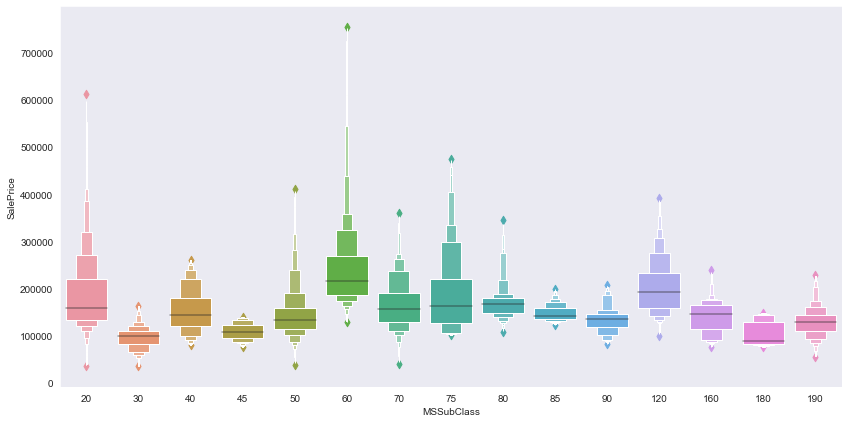

In [7]:
# relation b/w MSSubclass and SalePrice
plt.figure(figsize=(14,7))
sns.boxenplot(x='MSSubClass',y='SalePrice',data=train_df)

- SubClass 150 is only present in test data, and it can be approximated as type 160 for uniformity in train and test datasets

In [8]:
# converting the type
def convert(num):
    num = str(num)
    if num != "150":
        return "Type {}".format(num)
    else:
        return "Type 160"

In [9]:
# transform test and train datasets
train_df['MSSubClass'] = train_df['MSSubClass'].apply(convert)
test_df['MSSubClass'] = test_df['MSSubClass'].apply(convert)

In [10]:
train_df['MSSubClass'].isnull().sum()

0

- MSSubClass is cleaned and analyzed with no missing value

#### F2.MSZoning

- zoning classification 

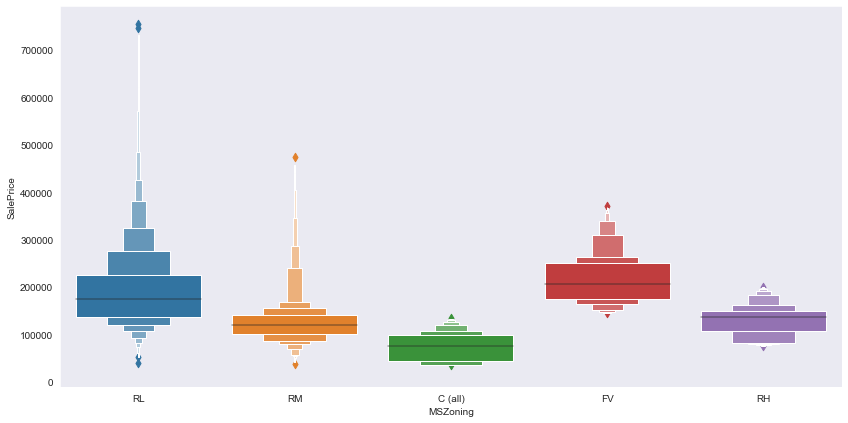

In [11]:
# relation b/w MSSubclass and SalePrice
plt.figure(figsize=(14,7))
sns.boxenplot(x='MSZoning',y='SalePrice',data=train_df)

In [12]:
# imputing missing values with mode
test_df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [13]:
test_df['MSZoning'] = test_df['MSZoning'].fillna("RL")

- MSZoning has clear correlation with Sale Price as a feature, missing values in the test data also imputed.

#### F3.Lot Frontage and Lot Area

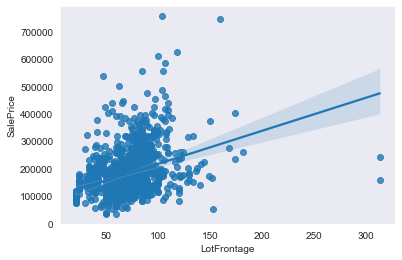

In [14]:
sns.regplot(x='LotFrontage',y='SalePrice',data=train_df)

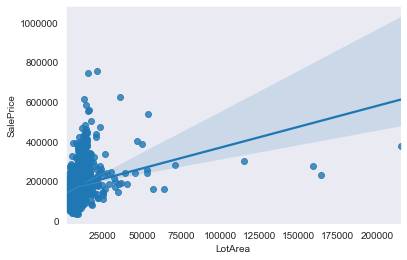

In [15]:
sns.regplot(x='LotArea',y='SalePrice',data=train_df)

- Both Lot Frontage and Lot Area are weakly correlated with SalePrice, can either be exculded or combined in a single feature
to give better prediction power.

In [16]:
train_df['LotArea'].isnull().sum()

0

In [17]:
test_df['LotArea'].isnull().sum()

0

#### F4.Street

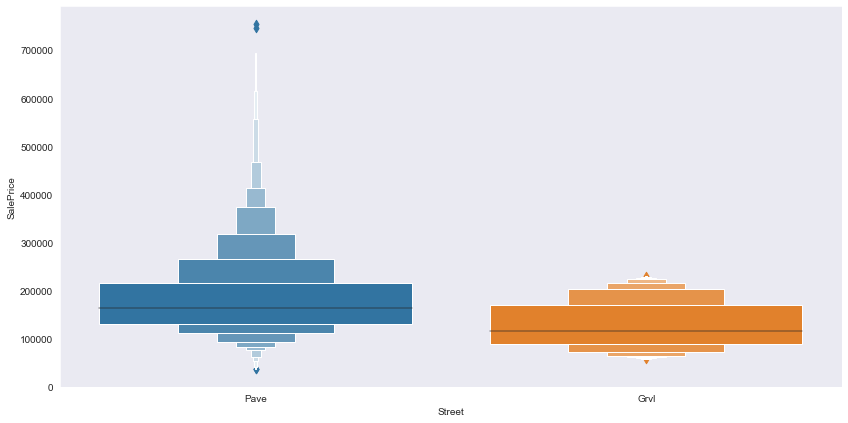

In [18]:
# analyzing street feature
plt.figure(figsize=(14,7))
sns.boxenplot(x='Street',y='SalePrice',data=train_df)

In [19]:
train_df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [20]:
test_df['Street'].isnull().sum()

0

- Street feature has no missing data, is correlated to SalePrice with Paved Roads commanding higher price on an average

#### F5.Alley

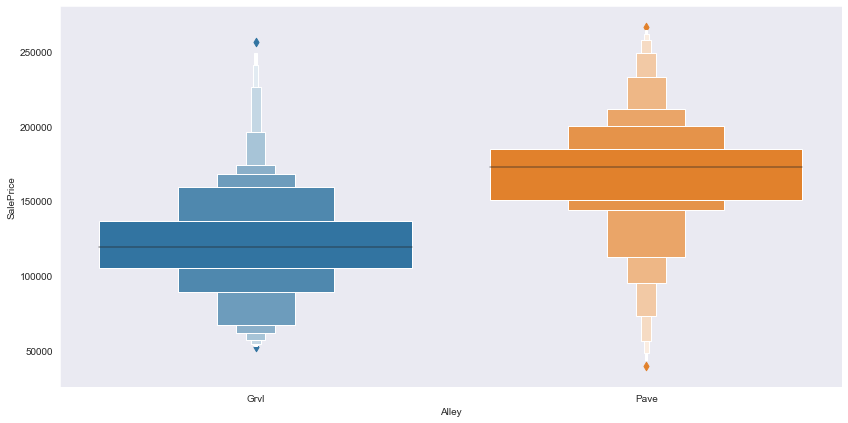

In [21]:
# analyzing street feature
plt.figure(figsize=(14,7))
sns.boxenplot(x='Alley',y='SalePrice',data=train_df)

In [22]:
# impute the missing value with NA
train_df['Alley'] = train_df['Alley'].fillna('NA')
test_df['Alley'] = test_df['Alley'].fillna('NA')

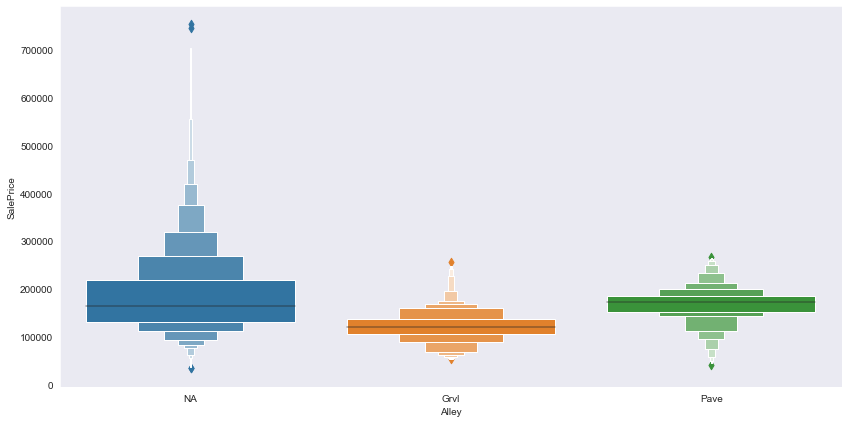

In [23]:
# analyzing street feature with NA
plt.figure(figsize=(14,7))
sns.boxenplot(x='Alley',y='SalePrice',data=train_df)

In [24]:
train_df['Alley'].unique()

array(['NA', 'Grvl', 'Pave'], dtype=object)

- From the table description provided in txt file, i am assuming that the missing values have no Alley access and converted
them in a new category

#### F6.Lot Shape

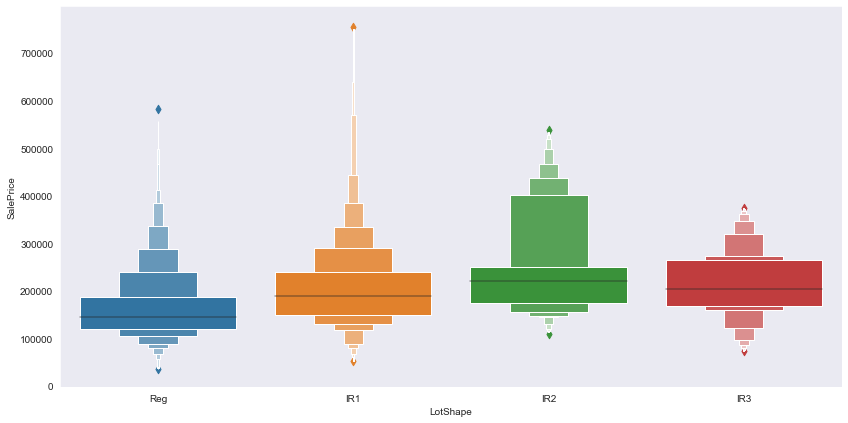

In [25]:
# analyzing street feature with NA
plt.figure(figsize=(14,7))
sns.boxenplot(x='LotShape',y='SalePrice',data=train_df)

In [26]:
test_df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

- This is counterintuitive, properties with irregular lot sizes are costlier on average. 

#### F7.Utilities

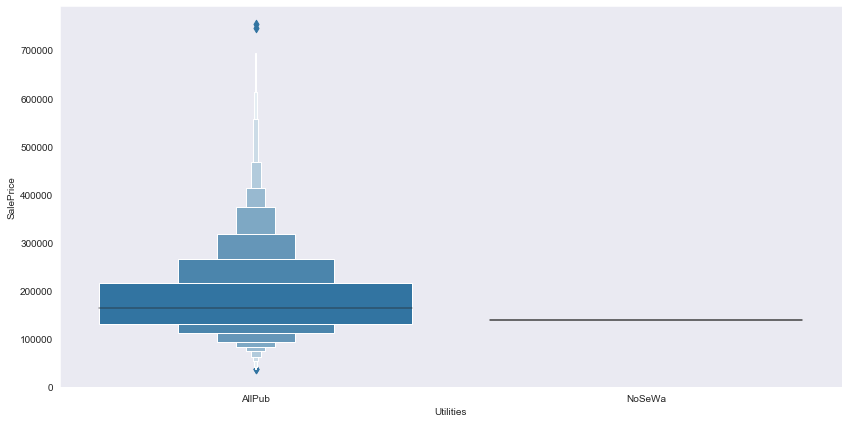

In [27]:
# analyzing street feature with NA
plt.figure(figsize=(14,7))
sns.boxenplot(x='Utilities',y='SalePrice',data=train_df)

In [28]:
test_df['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

- Utilities has no variance at all, all except one property in train dataset is other type, this feature can be dropped.

#### F8. Lot Config

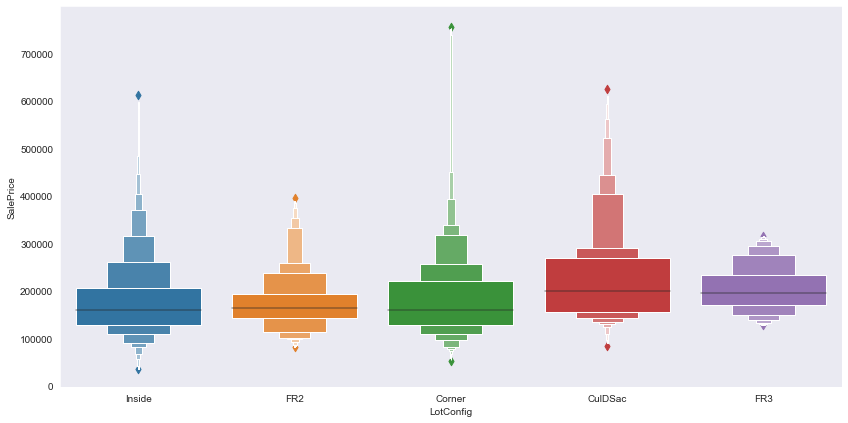

In [29]:
# analyzing street feature with NA
plt.figure(figsize=(14,7))
sns.boxenplot(x='LotConfig',y='SalePrice',data=train_df)

In [30]:
train_df['LotConfig'].isnull().sum()

0

- LotConfig has no missing values or feature incosistency in train and test df, However from visualization its prediction
power seems limited.

#### F9.LandSlope

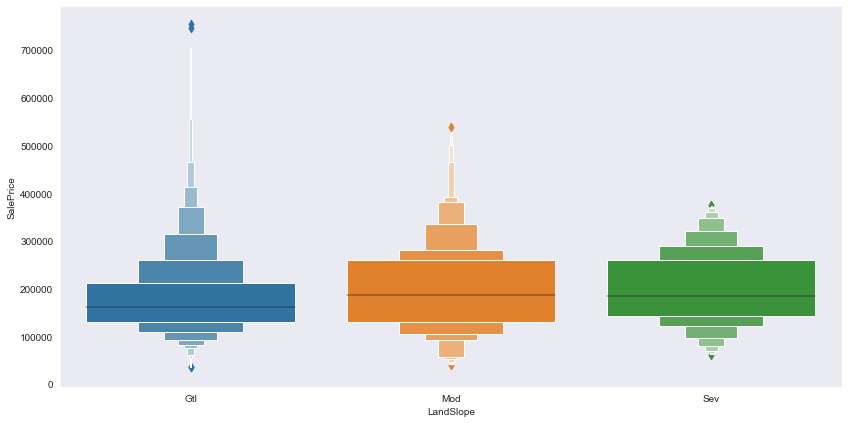

In [31]:
# analyzing street feature with NA
plt.figure(figsize=(14,7))
sns.boxenplot(x='LandSlope',y='SalePrice',data=train_df)

In [32]:
test_df['LandSlope'].value_counts()

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

- LandSlope has no missing values, from visualization it seems boxplot has mild prediction power for SalePrice

#### F10.Neighborhood

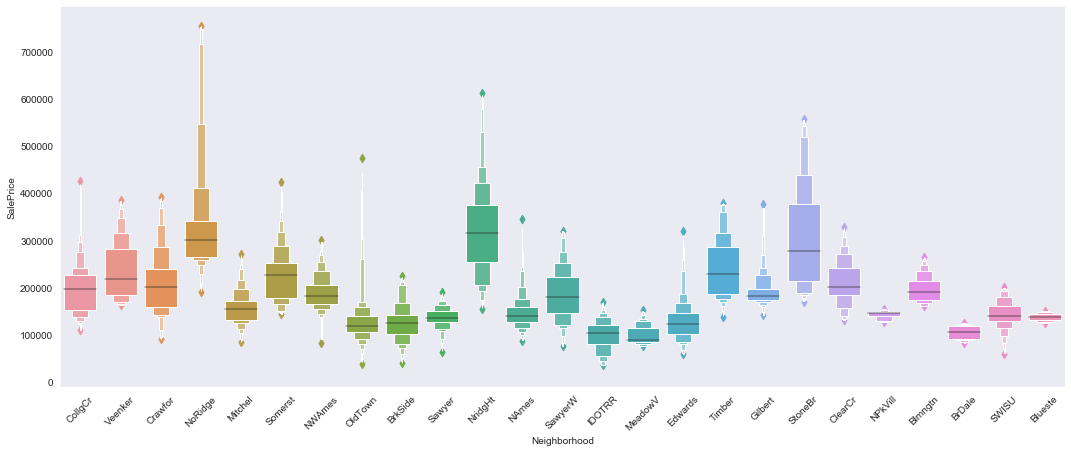

In [33]:
# analyzing street feature with NA
plt.figure(figsize=(18,7))
chart = sns.boxenplot(x='Neighborhood',y='SalePrice',data=train_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [34]:
train_df['Neighborhood'].isnull().sum()

0

- Train and Test datasets have no missing value, Neighborhood also a good predictor of SalePrice

#### F11.Condition 1 and Condition2

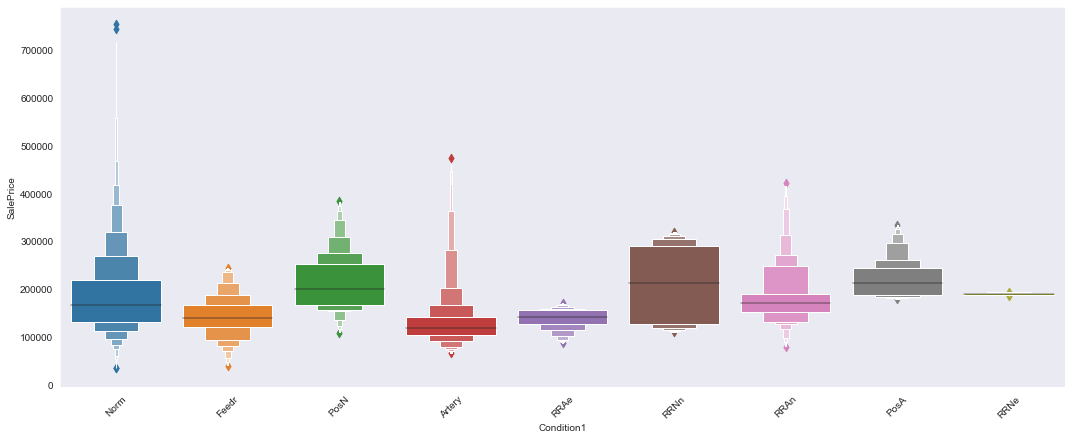

In [35]:
# analyzing condition1 with SalePrice
plt.figure(figsize=(18,7))
chart = sns.boxenplot(x='Condition1',y='SalePrice',data=train_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

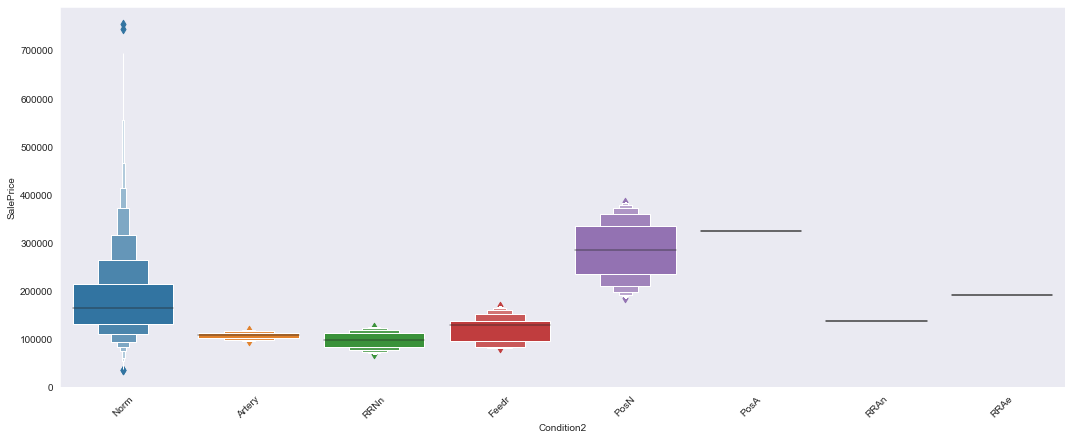

In [36]:
# analyzing condition2 with SalePrice
plt.figure(figsize=(18,7))
chart = sns.boxenplot(x='Condition2',y='SalePrice',data=train_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [37]:
test_df['Condition1'].isnull().sum()

0

- In addition to neighborhood Condition 1 may allow us to further traingulate the location of property

#### F12.Building Type

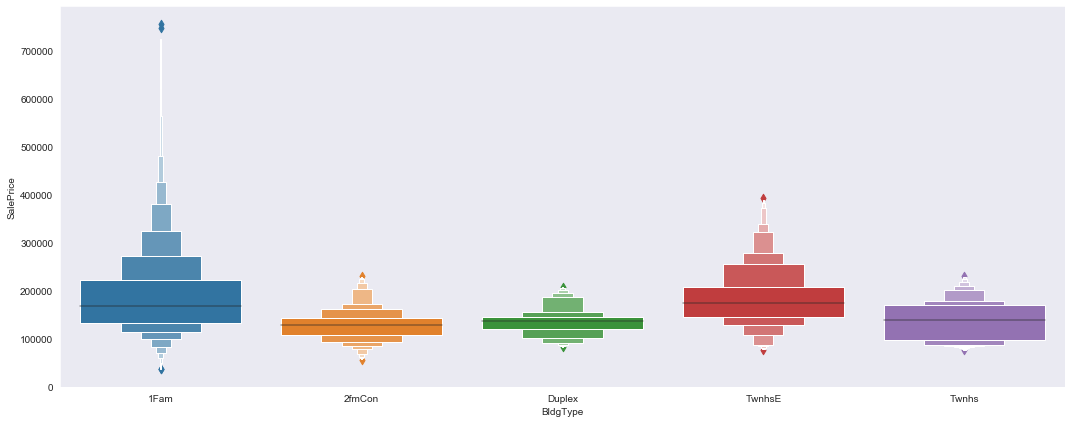

In [38]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='BldgType',y='SalePrice',data=train_df)

In [39]:
test_df['BldgType'].value_counts()

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64

- There are no missing values and categories are consistent across test and train, from visulaization BldgType appears to 
be a mild predictor of SalePrice

#### F13.HouseStyle

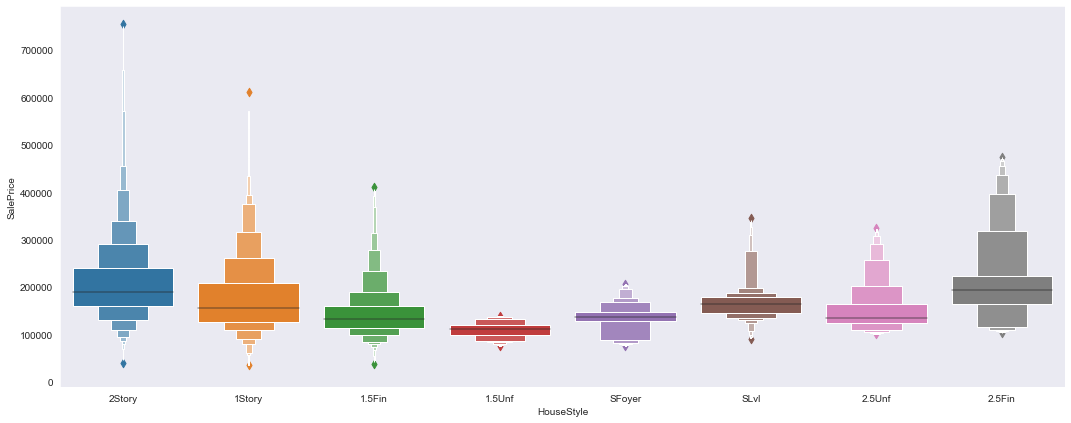

In [40]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='HouseStyle',y='SalePrice',data=train_df)

In [41]:
test_df['HouseStyle'].unique()

array(['1Story', '2Story', 'SLvl', '1.5Fin', 'SFoyer', '2.5Unf', '1.5Unf'],
      dtype=object)

In [42]:
# category 2.5Fin is similar to 2Story and can be merged with to make test and train sets similar
def changestyle(element):
    if element == '2.5Fin':
        return '2Story'
    else:
        return element

In [43]:
train_df['HouseStyle'] = train_df['HouseStyle'].apply(changestyle)

In [44]:
train_df['HouseStyle'].isnull().sum()

0

- HouseStyle is consistent across train and test with no missing values, also it has correlation with train and test

#### F14.Overall Quality and Overall Condition

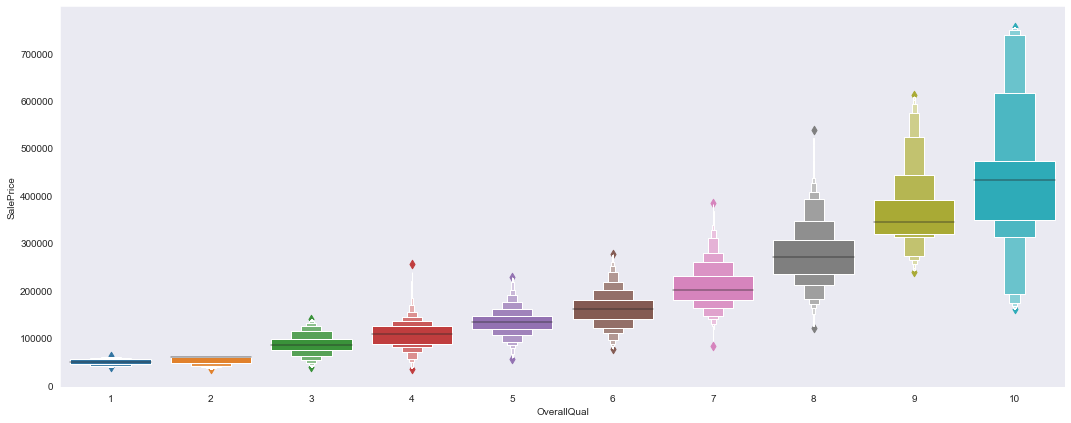

In [45]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='OverallQual',y='SalePrice',data=train_df)

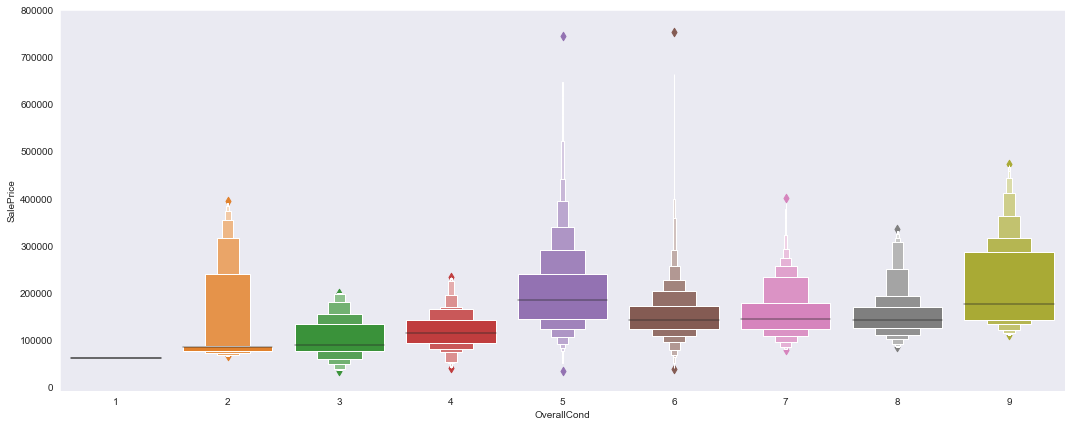

In [46]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='OverallCond',y='SalePrice',data=train_df)

In [47]:
#conveting the Quality string
def convertQual(ele):
    return "Quality {}".format(ele)

In [48]:
train_df['OverallQual'] = train_df['OverallQual'].apply(convertQual)
test_df['OverallQual'] = test_df['OverallQual'].apply(convertQual)

In [49]:
#convert the Condition string
def convertCond(ele):
    return "Condition {}".format(ele)

In [50]:
train_df['OverallCond'] = train_df['OverallCond'].apply(convertCond)
test_df['OverallCond'] = test_df['OverallCond'].apply(convertCond)

- No missing features and consistent, overall quality and condition can be used as predictor in model

#### F15.Year Built and Remodel

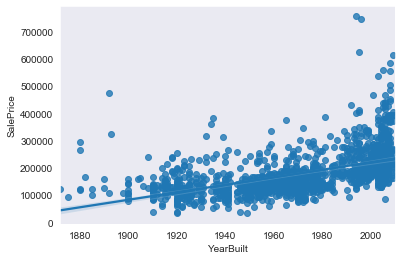

In [51]:
sns.regplot(x='YearBuilt',y='SalePrice',data=train_df)

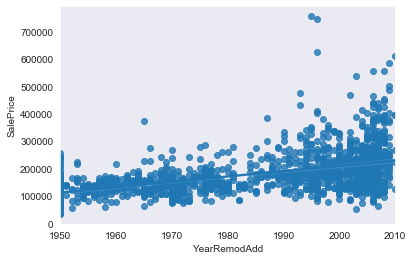

In [52]:
sns.regplot(x='YearRemodAdd',y='SalePrice',data=train_df)

In [53]:
train_df['YearRemodAdd'].isnull().sum()

0

- no missing values and consistent data, low prediction power

#### F16.Roof type and material

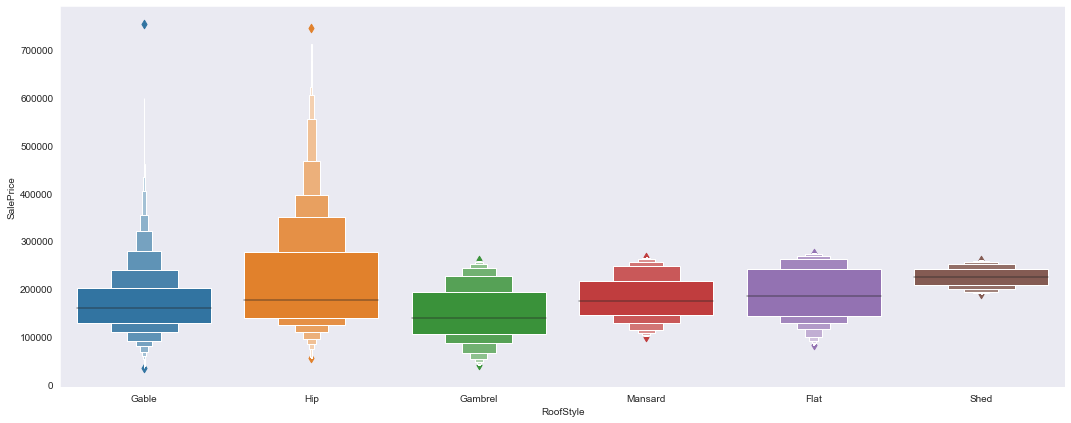

In [54]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='RoofStyle',y='SalePrice',data=train_df)

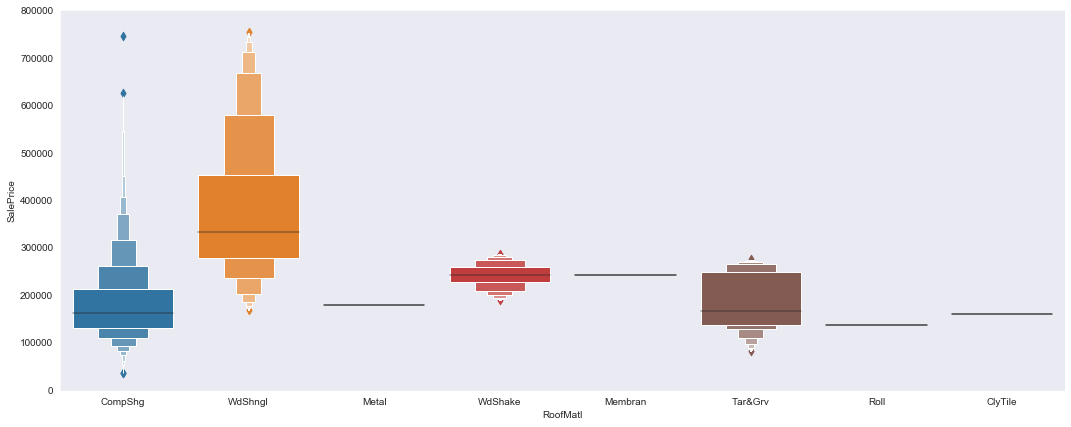

In [55]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='RoofMatl',y='SalePrice',data=train_df)

In [56]:
train_df['RoofMatl'].isnull().sum()

0

- roof style and condition don't apprear to be powerful predictors of SalePrice 

#### F17.Sale Condition

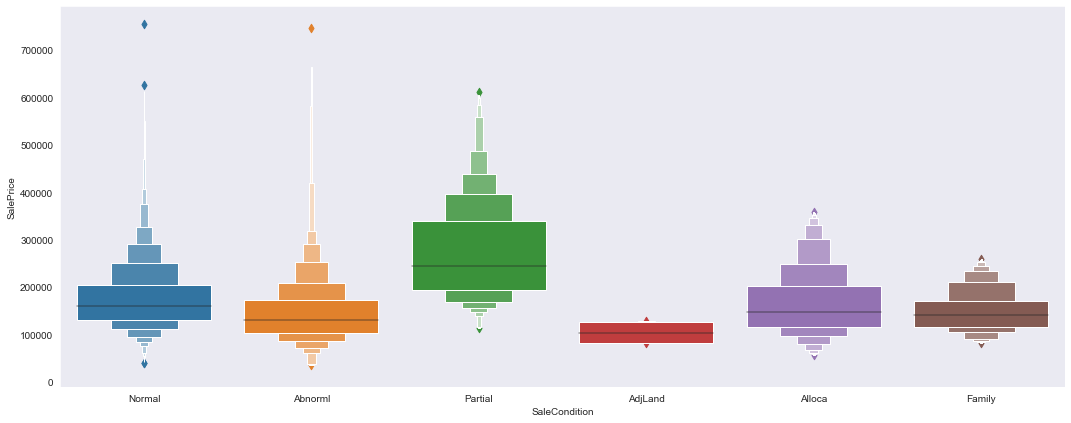

In [57]:
# Sale Condition 
plt.figure(figsize=(18,7))
sns.boxenplot(x='SaleCondition',y='SalePrice',data=train_df)

In [58]:
test_df['SaleCondition'].unique()

array(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'],
      dtype=object)

- features consistent and no missing values

#### F18.Sale Type

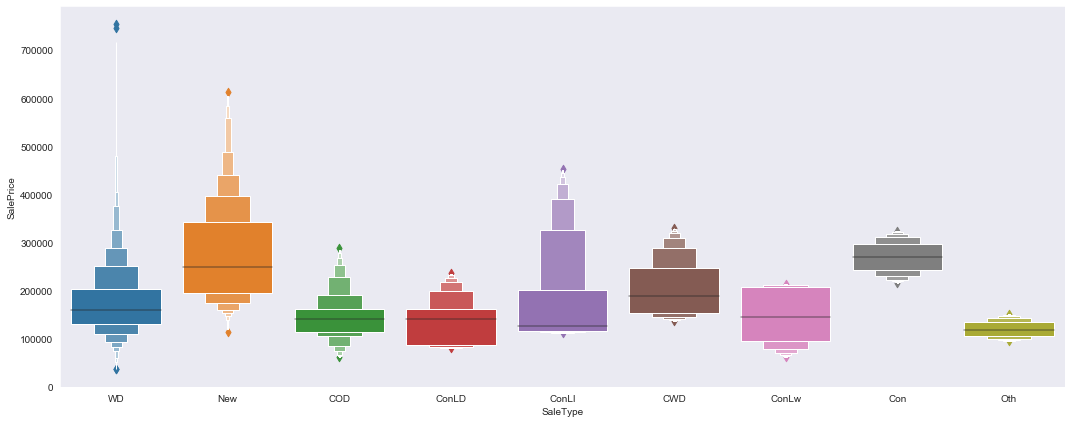

In [59]:
# Sale type vs price
plt.figure(figsize=(18,7))
sns.boxenplot(x='SaleType',y='SalePrice',data=train_df)

In [60]:
#imputing missing values in test df
test_df['SaleType'] = test_df['SaleType'].fillna('WD')

- SaleType category is a good predictor for SalePrice, data consistent across train and test sets and missing values imputed

#### F19.YrSold and MonthSold

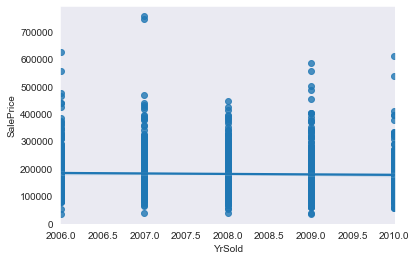

In [61]:
# yrsold vs saleprice
sns.regplot(x='YrSold',y='SalePrice',data=train_df)

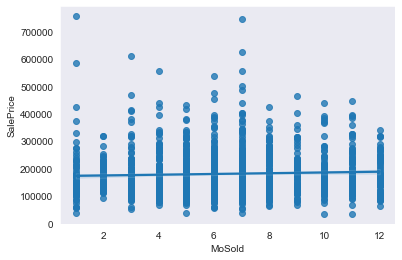

In [62]:
# yrsold vs saleprice
sns.regplot(x='MoSold',y='SalePrice',data=train_df)

- Both yearsold and monthsold are independent of SalePrice, hence these features can be safely dropped from model

#### F20.Misc Value and Misc Feature

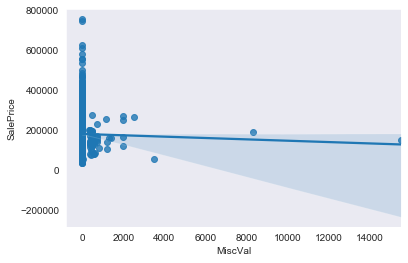

In [63]:
# miscvalue vs saleprice
sns.regplot(x='MiscVal',y='SalePrice',data=train_df)

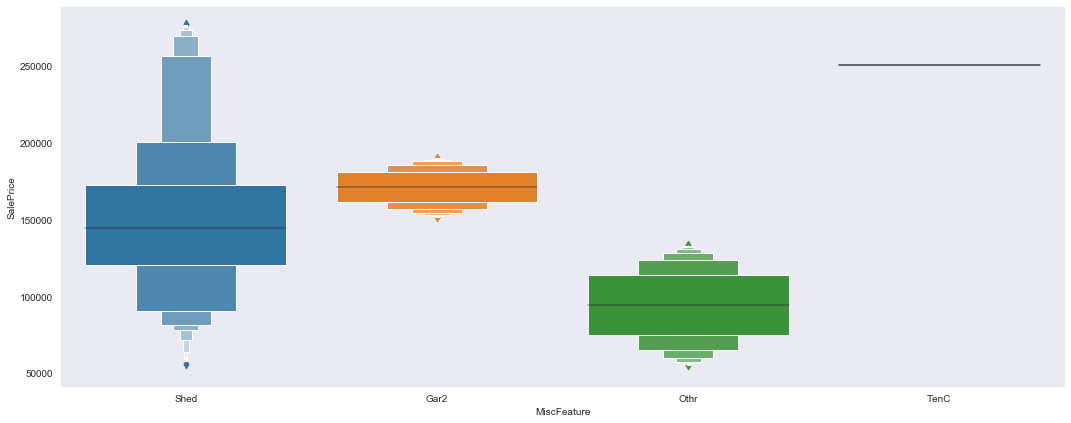

In [64]:
# miscfeature vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='MiscFeature',y='SalePrice',data=train_df)

In [65]:
train_df['MiscFeature'].isnull().sum()

1406

- too many missing value, MiscFeature and MiscVal can be dropped

#### F21.Fence 

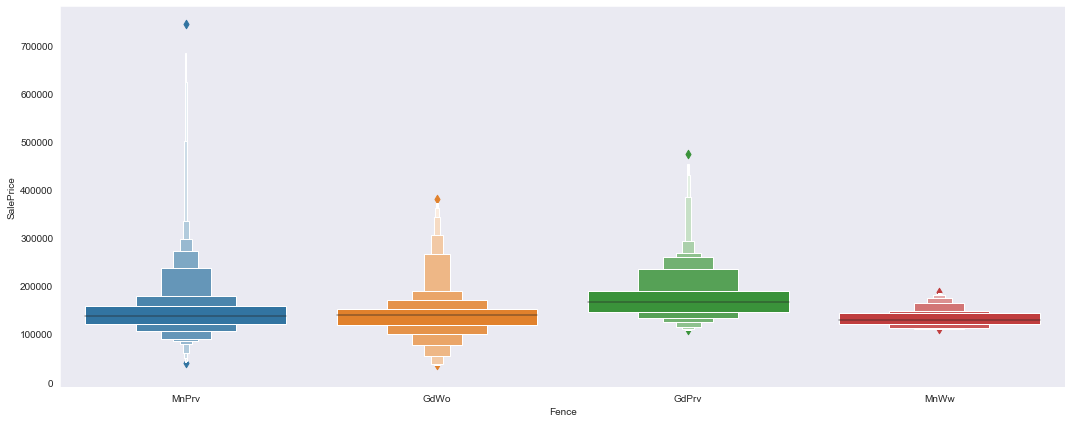

In [66]:
# fence vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='Fence',y='SalePrice',data=train_df)

In [67]:
# imputing missing fences with 'NF'-> No Fence
train_df['Fence'] = train_df['Fence'].fillna('NF')
test_df['Fence'] = test_df['Fence'].fillna('NF')

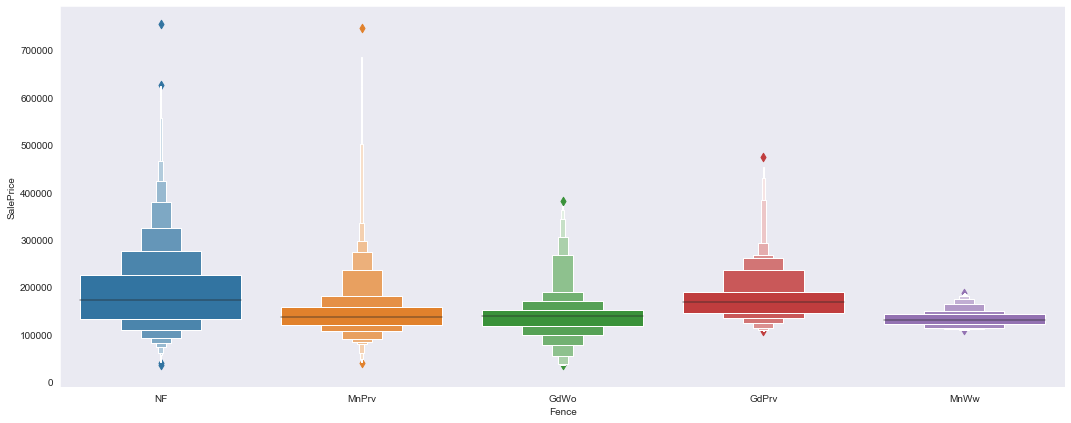

In [68]:
# fence vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='Fence',y='SalePrice',data=train_df)

- Fence feature has little variation across categories, missing values imputed

#### F22.Pool Area and Quality

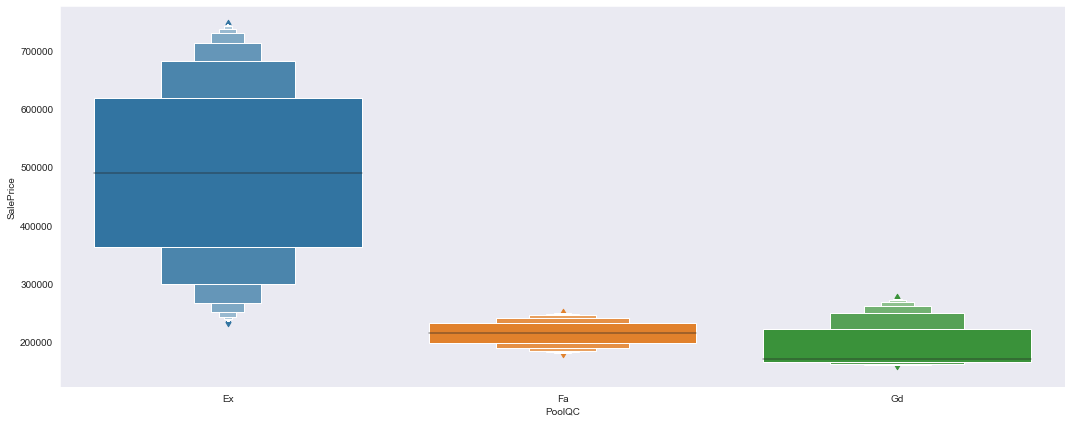

In [69]:
# fence vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='PoolQC',y='SalePrice',data=train_df)

- Very Few houses have pool (single digit), so including this feature will be of little to no help in modeling, hence it's a
good idea to drop it

#### F23.Porch Types

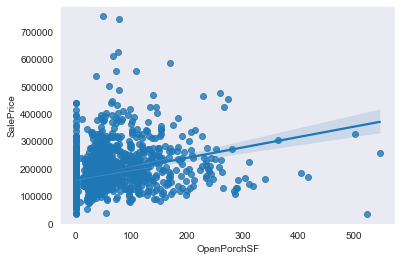

In [70]:
# miscvalue vs saleprice
sns.regplot(x='OpenPorchSF',y='SalePrice',data=train_df)

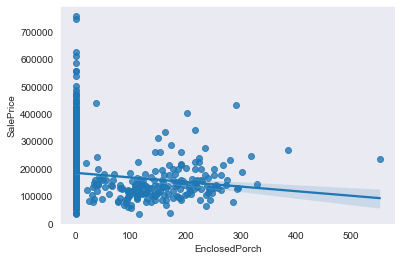

In [71]:
sns.regplot(x='EnclosedPorch',y='SalePrice',data=train_df)

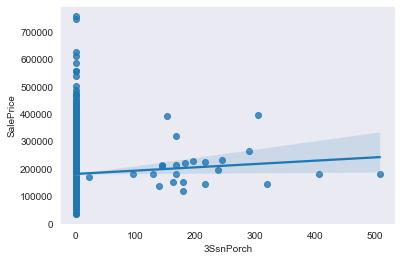

In [72]:
sns.regplot(x='3SsnPorch',y='SalePrice',data=train_df)

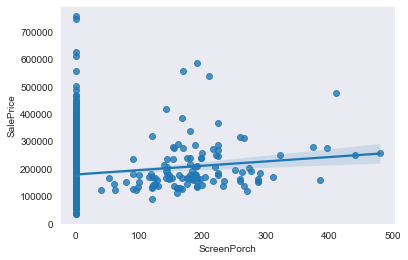

In [73]:
sns.regplot(x='ScreenPorch',y='SalePrice',data=train_df)

- OpenPorchSF is the only feature with a significant correlation to SalePrice, all other features can be dropped

#### F24.WoodDeckSF

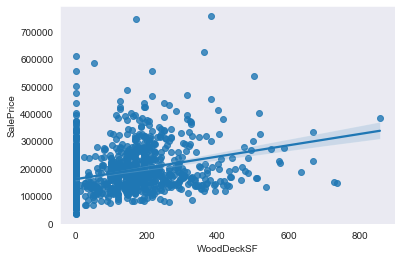

In [74]:
# fence vs saleprice
sns.regplot(x='WoodDeckSF',y='SalePrice',data=train_df)

- mild correlation with SalePrice

#### F25.PavedDrive

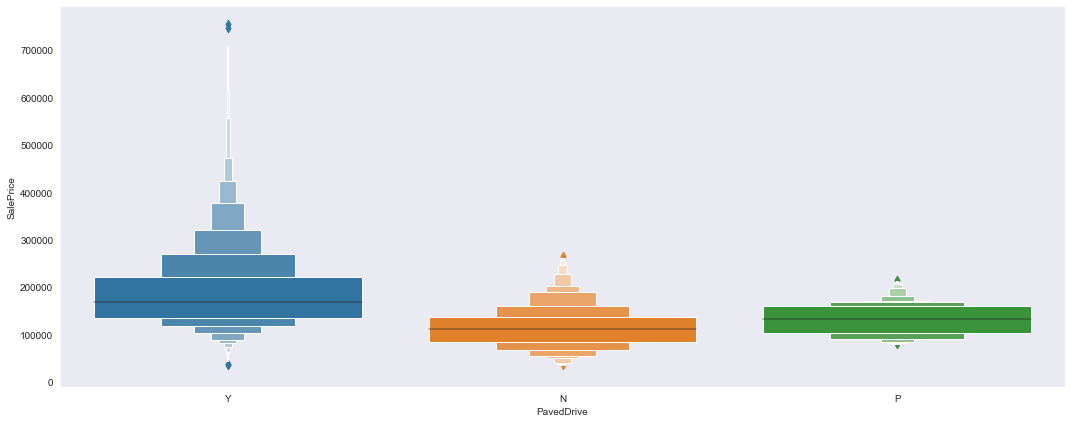

In [75]:
# fence vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='PavedDrive',y='SalePrice',data=train_df)

- Paved Drive is a feature with variation across categories,no missing values and consistency across test and train sets

#### F26.Garage Features

In [76]:
train_df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [77]:
#Imputing No Garage with NG
train_df['GarageType'] = train_df['GarageType'].fillna('NG')
test_df['GarageType'] = test_df['GarageType'].fillna('NG')

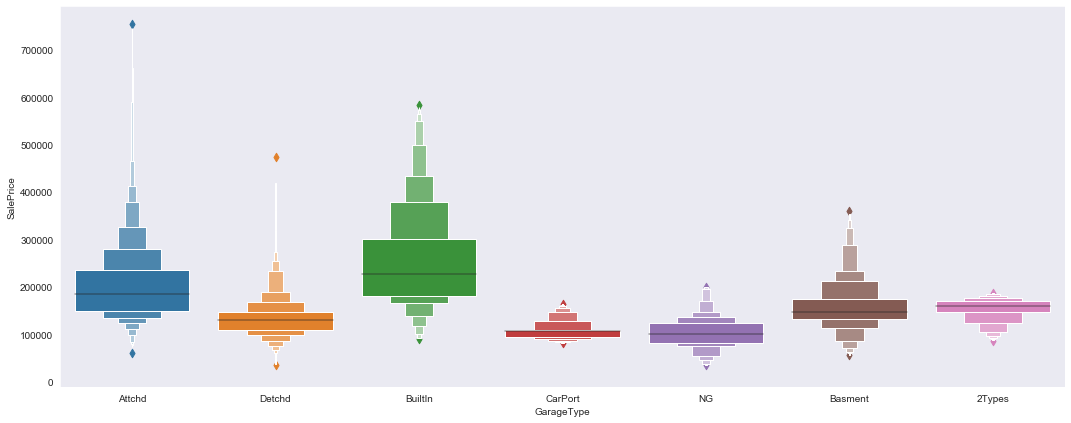

In [78]:
# GarageType vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='GarageType',y='SalePrice',data=train_df)

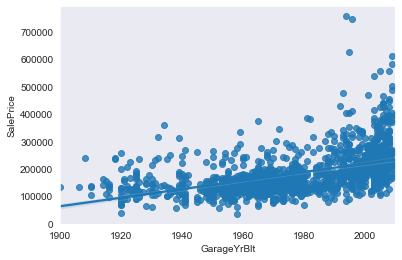

In [79]:
# fence vs saleprice
sns.regplot(x='GarageYrBlt',y='SalePrice',data=train_df)

In [80]:
#Imputing Garage Qual
train_df['GarageQual'] = train_df['GarageQual'].fillna('NG')
test_df['GarageQual'] = test_df['GarageQual'].fillna('NG')

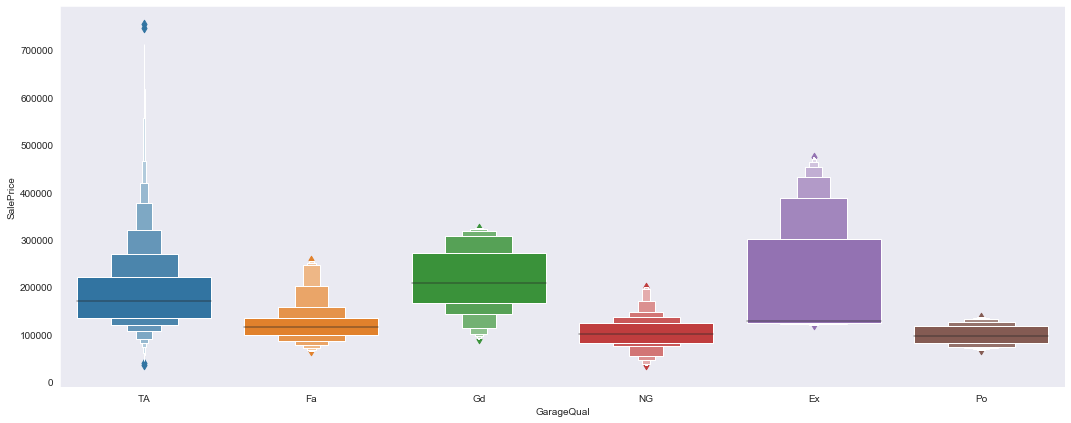

In [81]:
# Garage Qual vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='GarageQual',y='SalePrice',data=train_df)

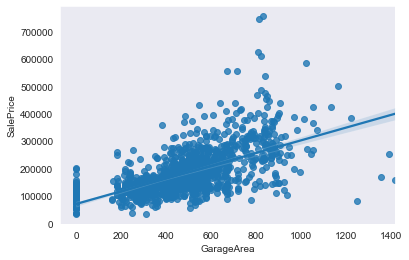

In [82]:
# garage-area vs saleprice
sns.regplot(x='GarageArea',y='SalePrice',data=train_df)

In [83]:
# impute missing Garage Area value

In [84]:
test_df['GarageArea'] = test_df['GarageArea'].fillna(470)

In [85]:
# checking missing values

In [86]:
test_df['GarageQual'].isnull().sum()

0

#### F27.FirePlaces

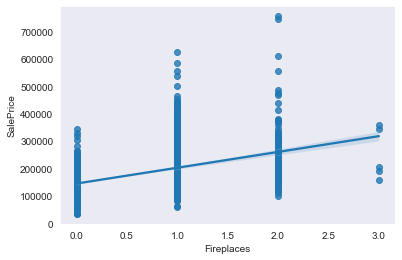

In [87]:
# number of fireplaces vs saleprice
sns.regplot(x='Fireplaces',y='SalePrice',data=train_df)

In [88]:
# imputing fireplace Quality data by replacing missing values with NF
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna("NF")
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna("NF")

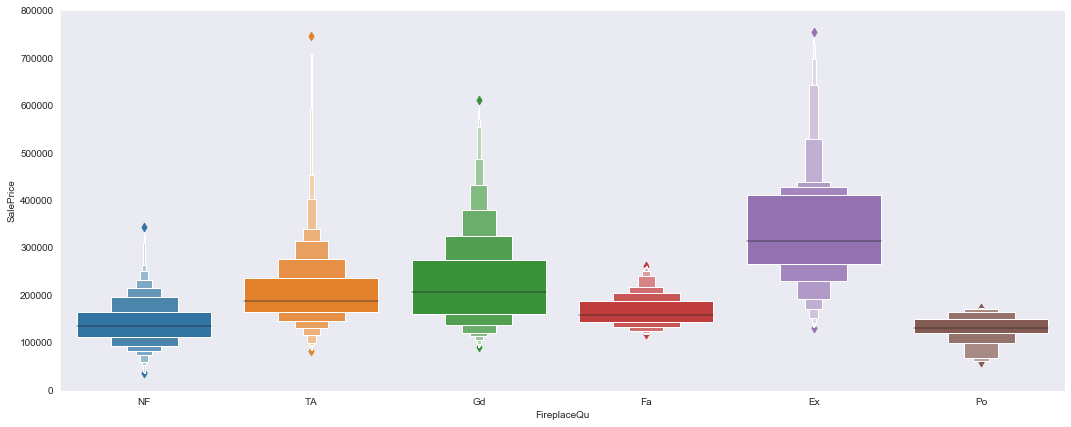

In [89]:
# Garage Qual vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='FireplaceQu',y='SalePrice',data=train_df)

In [90]:
test_df['FireplaceQu'].isnull().sum()

0

- Both # of fireplaces and fireplace quality are correlated to SalePrice

#### F27.Functional

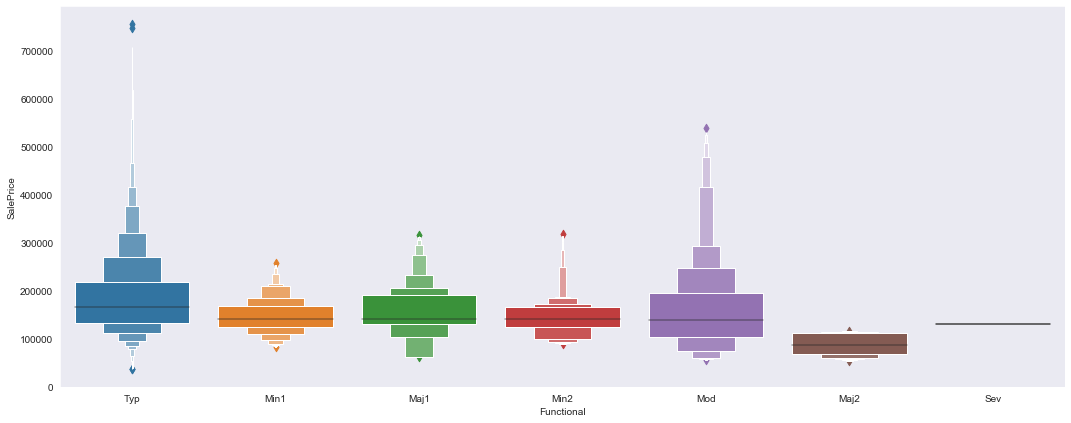

In [91]:
# fence vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='Functional',y='SalePrice',data=train_df)

- distrbution of Functional feature across categories is more or less the same, this feature can be dropped in the model

#### F28.Total Rooms above the ground

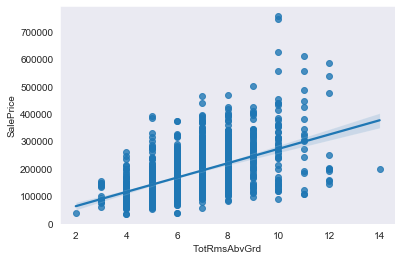

In [92]:
# number of fireplaces vs saleprice
sns.regplot(x='TotRmsAbvGrd',y='SalePrice',data=train_df)

- Higher number of rooms above the ground clearly commands higher Sale Price

#### F29.Kitchens

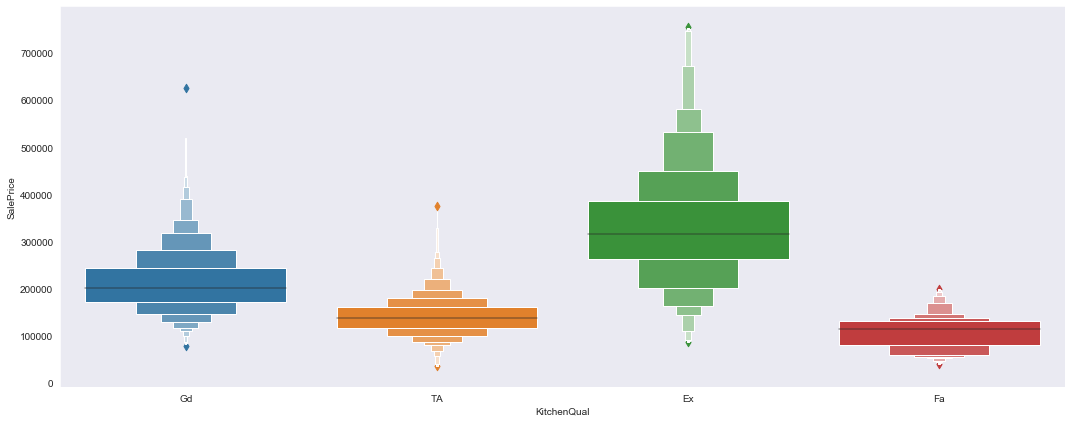

In [93]:
# Garage Qual vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='KitchenQual',y='SalePrice',data=train_df)

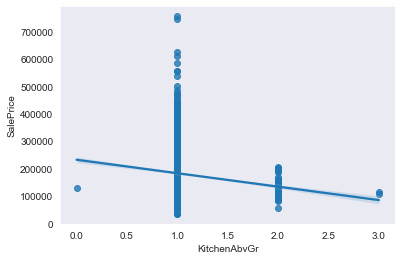

In [94]:
# number of Kitchens vs saleprice
sns.regplot(x='KitchenAbvGr',y='SalePrice',data=train_df)

In [95]:
test_df['KitchenQual'].isnull().sum()

1

- Kitchen Quality is not an important, both kitchen feature can be dropped from the model.

#### F30.Bathrooms

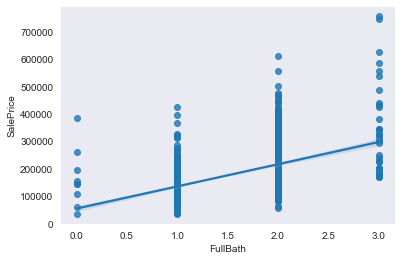

In [96]:
# number of bathrooms above ground vs saleprice
sns.regplot(x='FullBath',y='SalePrice',data=train_df)

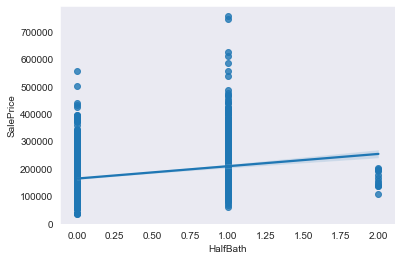

In [97]:
# number of Half-bathrooms above ground vs saleprice
sns.regplot(x='HalfBath',y='SalePrice',data=train_df)

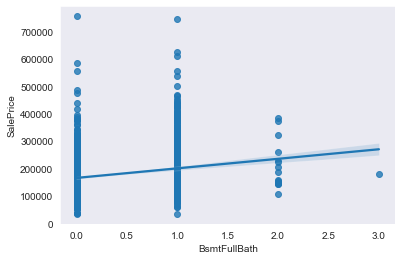

In [98]:
# number of Basement Full-bathrooms above ground vs saleprice
sns.regplot(x='BsmtFullBath',y='SalePrice',data=train_df)

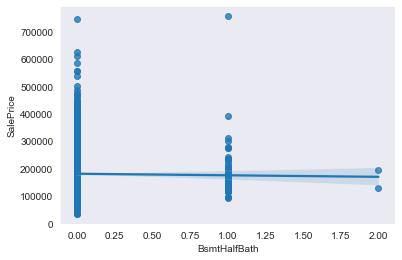

In [99]:
# number of Basement Half-bathrooms above ground vs saleprice
sns.regplot(x='BsmtHalfBath',y='SalePrice',data=train_df)

In [100]:
train_df['FullBath'].isnull().sum()

0

- Only Full Bath feature is a good predictor of SalePrice and encapsulates other features too, rest features can be dropped.

#### F31.Exteriors

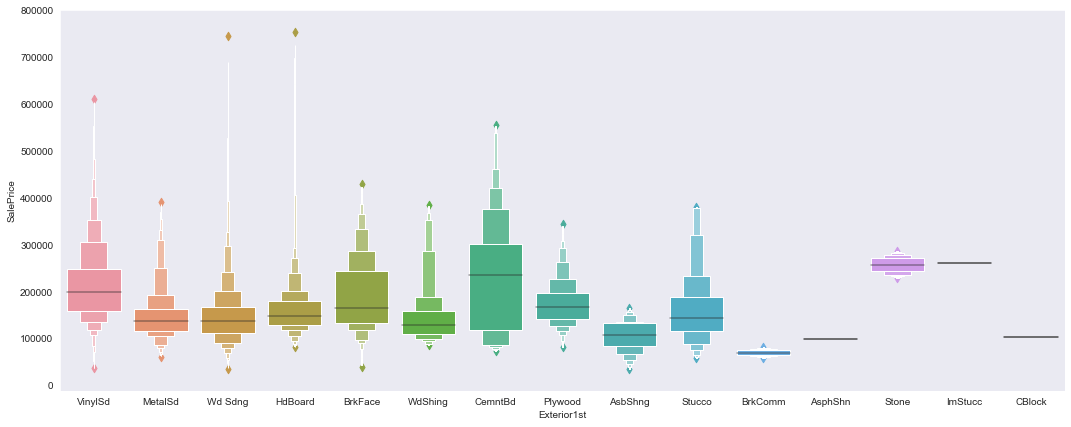

In [101]:
# Exteriors vs saleprice
plt.figure(figsize=(18,7))
sns.boxenplot(x='Exterior1st',y='SalePrice',data=train_df)

In [102]:
#imputing missing values
test_df['Exterior1st'] = test_df['Exterior1st'].fillna("VinylSd")

In [103]:
test_df['Exterior1st'].unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'CemntBd',
       'WdShing', 'BrkFace', 'AsbShng', 'BrkComm', 'Stucco', 'AsphShn',
       'CBlock'], dtype=object)

In [104]:
train_df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [105]:
# make exterior category consistent across test and train
def converExt(ele):
    if ele in ['Stone','ImStucc']:
        return "CemntBd"
    else:
        return ele

In [106]:
# making test and train categories consistent
train_df['Exterior1st'] = train_df['Exterior1st'].apply(converExt)

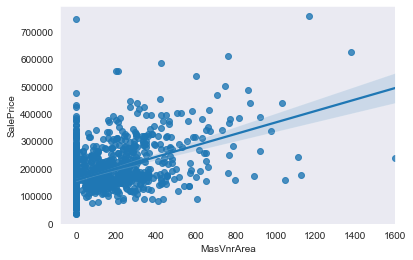

In [107]:
# MasVnrArea vs SalePrice
sns.regplot(x='MasVnrArea',y='SalePrice',data=train_df)

In [108]:
train_df['MasVnrArea'].max()

1600.0

In [109]:
# imputing missing values
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

In [110]:
# External Quality and Condition

In [111]:
test_df['ExterQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

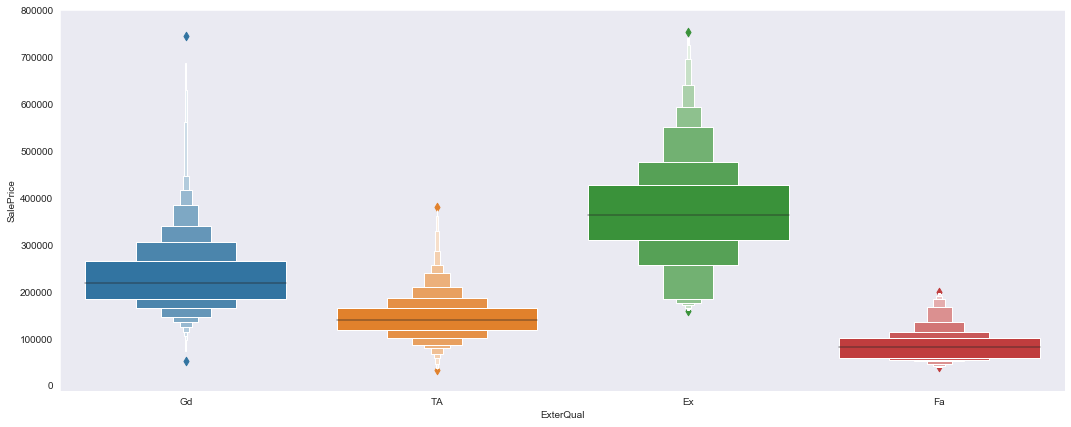

In [112]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='ExterQual',y='SalePrice',data=train_df)

In [113]:
# External Cond
test_df['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

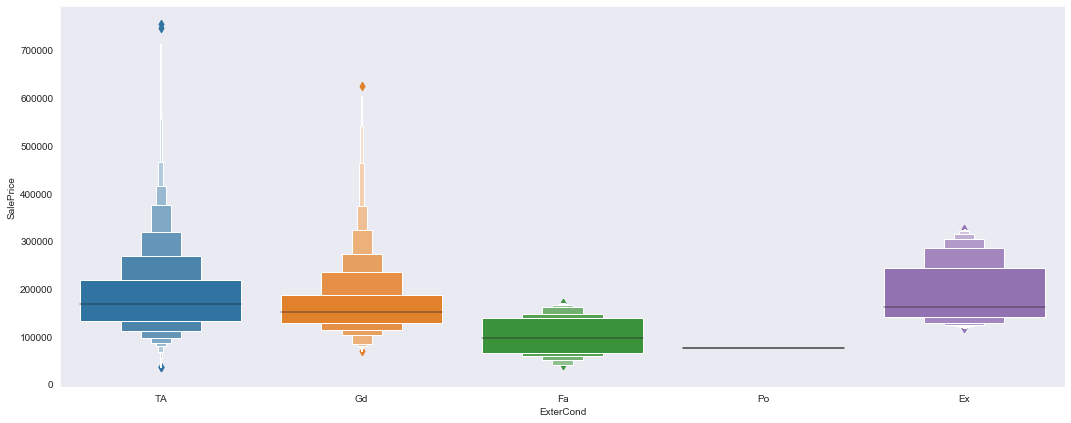

In [114]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='ExterCond',y='SalePrice',data=train_df)

- All exterior features analysed, features providing good prediction power are Exterior1st,MasVnrArea and ExterQual

#### F32.Foundation

In [115]:
# External Cond
test_df['Foundation'].unique()

array(['CBlock', 'PConc', 'BrkTil', 'Stone', 'Slab', 'Wood'], dtype=object)

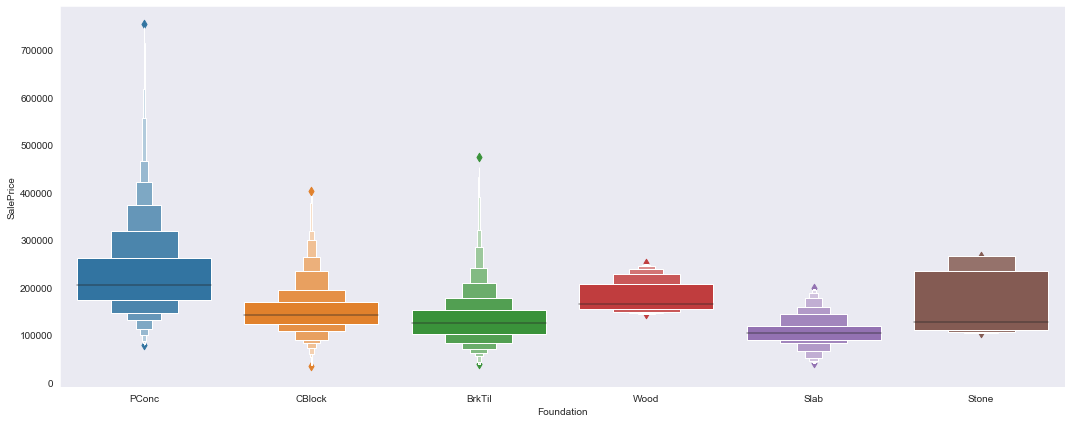

In [116]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='Foundation',y='SalePrice',data=train_df)

- Foundation has no missing values and consistent categories across train and test,can be included in model

#### F33.Basement features

In [117]:
# total basement surface area

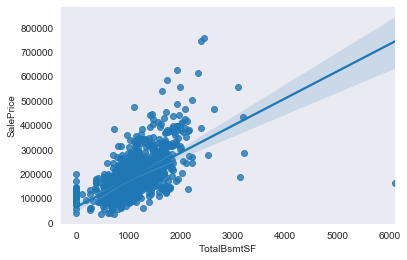

In [118]:
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=train_df)

In [119]:
# impute the missing value
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(0)

- Total Basement SF strongly predicts SalePrice

In [120]:
# Basement Quality

In [121]:
# imputing the missing values with NB (No basement)
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('NB')
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('NB')

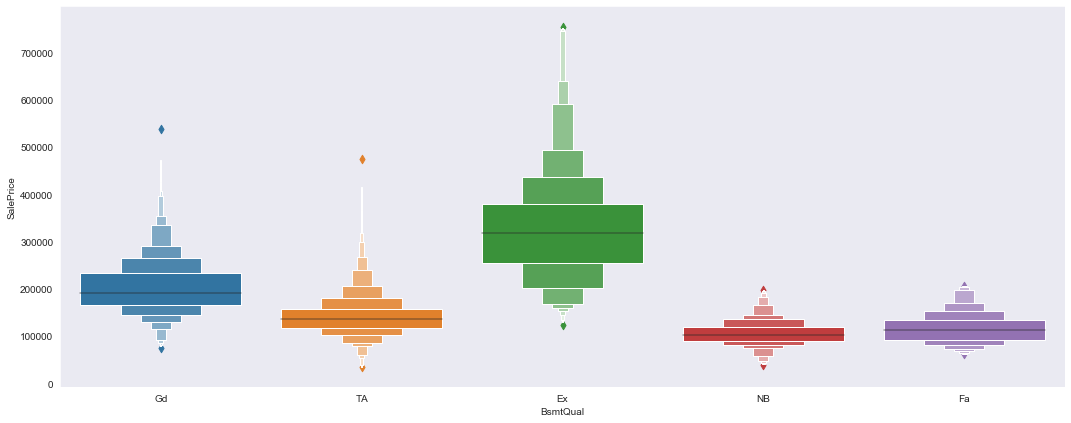

In [122]:
plt.figure(figsize=(18,7))
sns.boxenplot(x='BsmtQual',y='SalePrice',data=train_df)

- Basement Quality predicts saleprice well, missing data imputed and consistent acorss test and train

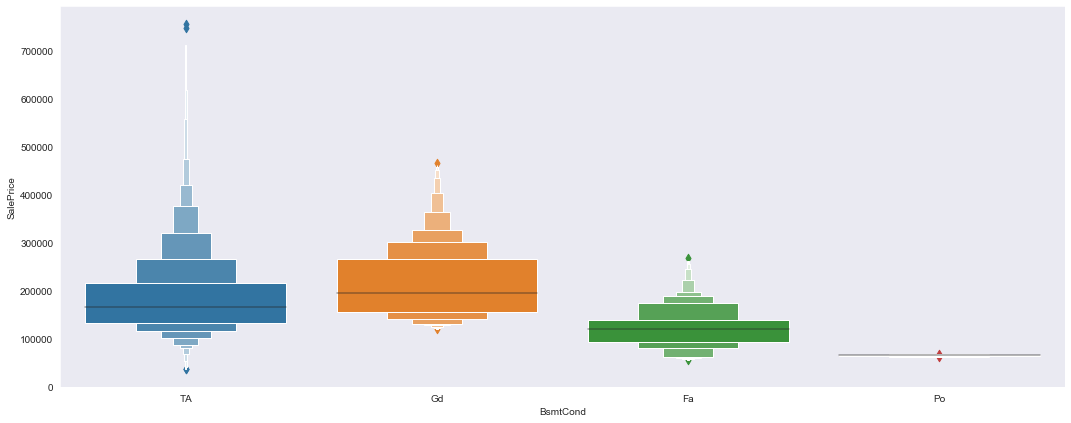

In [123]:
# Basement Condition
plt.figure(figsize=(18,7))
sns.boxenplot(x='BsmtCond',y='SalePrice',data=train_df)

- Basement Condition is not a good predictor and can be dropped from the model

In [124]:
# Basement FinType1

In [125]:
# imputing the missing values
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('NBA')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('NBA')

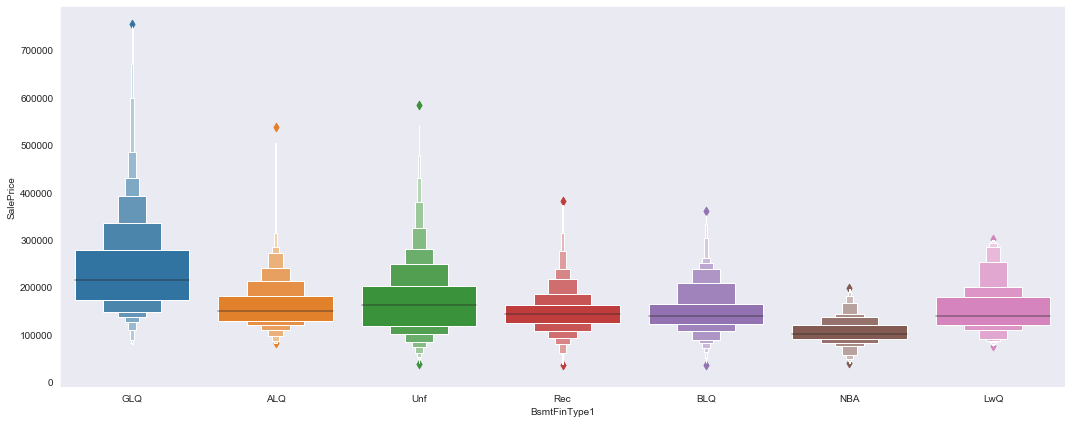

In [126]:
# analyzing correlation
plt.figure(figsize=(18,7))
sns.boxenplot(x='BsmtFinType1',y='SalePrice',data=train_df)

- Basement finish type is a weak predictor of SalePrice, however can be included in the model

#### F34.Heating and Cooling

In [127]:
# Type of heating

In [128]:
train_df['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

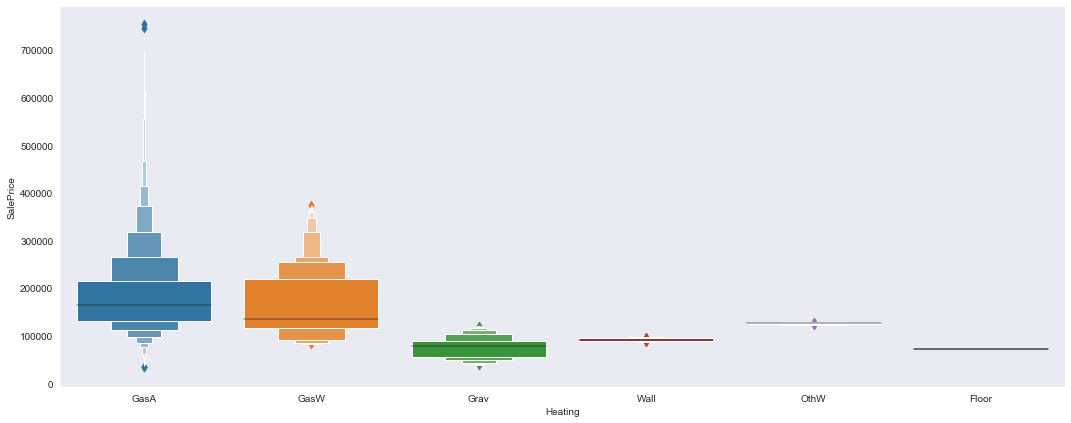

In [129]:
# analyzing correlation
plt.figure(figsize=(18,7))
sns.boxenplot(x='Heating',y='SalePrice',data=train_df)

- overwhelming amount of properties have only GasA type of heating,hence this feature can be dropped 

In [130]:
# Heating Quality

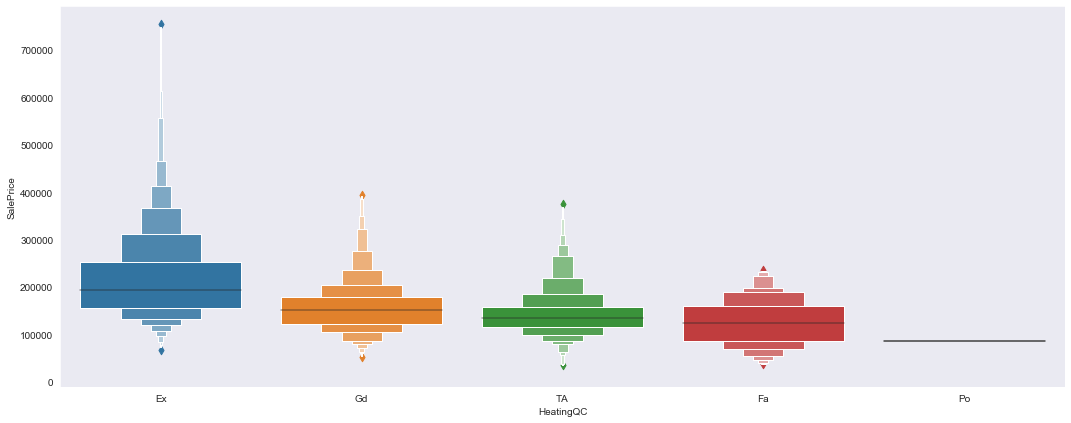

In [131]:
# analyzing correlation
plt.figure(figsize=(18,7))
sns.boxenplot(x='HeatingQC',y='SalePrice',data=train_df)

In [132]:
test_df['HeatingQC'].value_counts()

Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64

- Heating QC can be used as model feature, no missing data

In [133]:
# central air

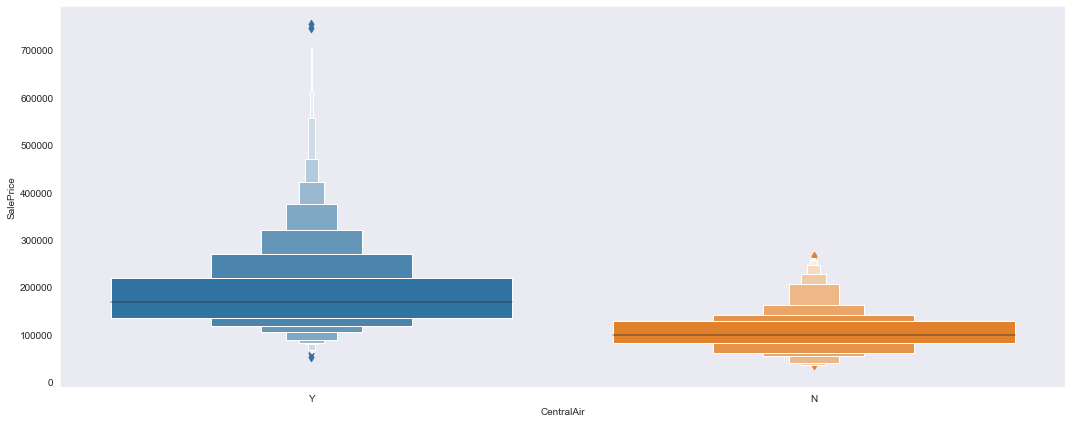

In [134]:
# analyzing correlation
plt.figure(figsize=(18,7))
sns.boxenplot(x='CentralAir',y='SalePrice',data=train_df)

In [135]:
train_df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

- Central Air is correlated to SalePrice, can be used as model feature

#### F35.Electricity

In [136]:
train_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [137]:
# impute missing electrical data
train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')

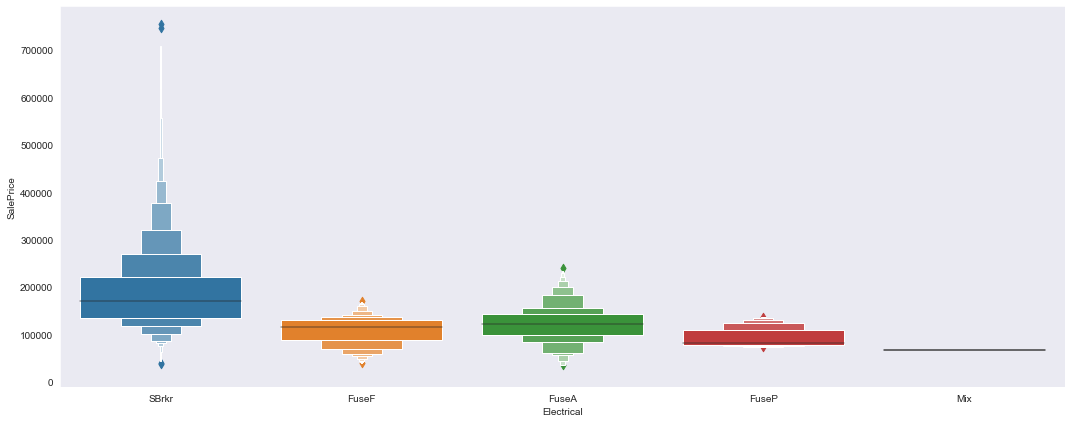

In [138]:
# analyzing correlation
plt.figure(figsize=(18,7))
sns.boxenplot(x='Electrical',y='SalePrice',data=train_df)

- Properties with Sbrkr are on an average costlier, feature can be included in model

#### F36.Surface Area

In [139]:
# 1st floor SF

In [140]:
train_df['1stFlrSF'].isnull().sum()

0

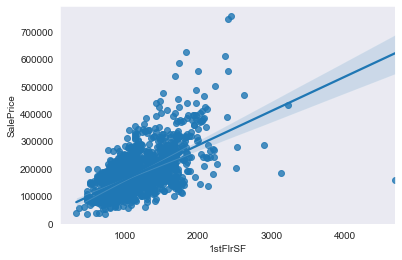

In [141]:
sns.regplot(x='1stFlrSF',y='SalePrice',data=train_df)

- 1st Floor Surface area is highly correlated to SalePrice, no missing values

In [142]:
# 2nd Floor SF

In [143]:
test_df['2ndFlrSF'].isnull().sum()

0

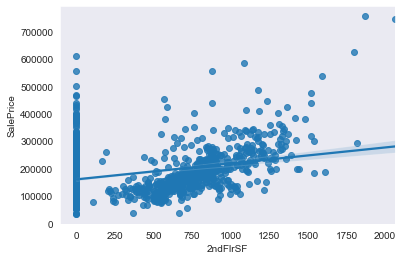

In [144]:
sns.regplot(x='2ndFlrSF',y='SalePrice',data=train_df)

- 2nd Floor SF is weakly correlated to SalePrice and can be dropped

In [145]:
# Above Ground Living Area

In [146]:
train_df['GrLivArea'].isnull().sum()

0

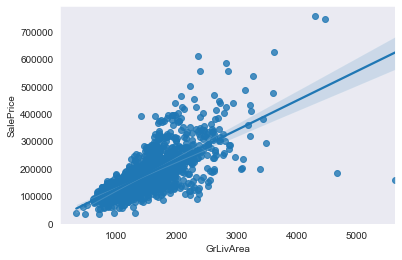

In [147]:
sns.regplot(x='GrLivArea',y='SalePrice',data=train_df)

- GrLivArea is strongly correlated to SalePrice and should be included in model

### 2.Feature Engineering and Importance

#### After exploring the features and their relationship with SalePrice, the following can be done:
- Remove features with weak or no correlation with SalePrice.
- Encode Categorical Features
- Make Train and Test Sets Ready for Modeling
- Identify Important Features with the help of sklearn

In [148]:
# Removing feature with weak correlation

In [149]:
feat_included = ["MSSubClass","MSZoning","Street","Alley","LotShape","LotConfig","Neighborhood","Condition1",
                 "BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","Exterior1st","ExterQual","Foundation",
                 "TotalBsmtSF","BsmtQual","BsmtFinType1","HeatingQC","CentralAir","Electrical","1stFlrSF","GrLivArea",
                  "FullBath","TotRmsAbvGrd","FireplaceQu","GarageType","GarageArea","PavedDrive","SaleType","SaleCondition"]

In [150]:
# Removing Additional Features
Xi_train = train_df[feat_included]
yi = train_df['SalePrice']
Xi_test = test_df[feat_included]

In [151]:
Xi_train.columns,Xi_test.columns

(Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LotConfig',
        'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
        'OverallCond', 'YearBuilt', 'Exterior1st', 'ExterQual', 'Foundation',
        'TotalBsmtSF', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
        'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
        'FireplaceQu', 'GarageType', 'GarageArea', 'PavedDrive', 'SaleType',
        'SaleCondition'],
       dtype='object'),
 Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LotConfig',
        'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
        'OverallCond', 'YearBuilt', 'Exterior1st', 'ExterQual', 'Foundation',
        'TotalBsmtSF', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
        'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
        'FireplaceQu', 'GarageType', 'GarageArea', 'PavedDrive', 'SaleType',
        'SaleConditi

In [152]:
Xi_train

,MSSubClass,MSZoning,Street,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,FireplaceQu,GarageType,GarageArea,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,Type 60,RL,Pave,NA,Reg,Inside,CollgCr,Norm,1Fam,2Story,...,856,1710,2,8,NF,Attchd,548,Y,WD,Normal
2,Type 20,RL,Pave,NA,Reg,FR2,Veenker,Feedr,1Fam,1Story,...,1262,1262,2,6,TA,Attchd,460,Y,WD,Normal
3,Type 60,RL,Pave,NA,IR1,Inside,CollgCr,Norm,1Fam,2Story,...,920,1786,2,6,TA,Attchd,608,Y,WD,Normal
4,Type 70,RL,Pave,NA,IR1,Corner,Crawfor,Norm,1Fam,2Story,...,961,1717,1,7,Gd,Detchd,642,Y,WD,Abnorml
5,Type 60,RL,Pave,NA,IR1,FR2,NoRidge,Norm,1Fam,2Story,...,1145,2198,2,9,TA,Attchd,836,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,Type 60,RL,Pave,NA,Reg,Inside,Gilbert,Norm,1Fam,2Story,...,953,1647,2,7,TA,Attchd,460,Y,WD,Normal
1457,Type 20,RL,Pave,NA,Reg,Inside,NWAmes,Norm,1Fam,1Story,...,2073,2073,2,7,TA,Attchd,500,Y,WD,Normal
1458,Type 70,RL,Pave,NA,Reg,Inside,Crawfor,Norm,1Fam,2Story,...,1188,2340,2,9,Gd,Attchd,252,Y,WD,Normal


In [153]:
# listing  object features
obj_cols = ["MSSubClass","MSZoning","Street","Alley","LotShape","LotConfig","Neighborhood","Condition1","BldgType",
                "HouseStyle","OverallQual","OverallCond","Exterior1st","ExterQual","Foundation","BsmtQual","BsmtFinType1",
                "HeatingQC","CentralAir","Electrical","FireplaceQu","GarageType","PavedDrive","SaleType","SaleCondition"]

# One-hot enoding with pandas => get_dummies function
for col in obj_cols:
    dummy = pd.get_dummies(Xi_train[col],drop_first=False)
    dummy = dummy.add_prefix('{}_'.format(col))
    Xi_train.drop(col,axis=1,inplace=True)
    Xi_train = Xi_train.join(dummy)
    
for col in obj_cols:
    dummy = pd.get_dummies(Xi_test[col],drop_first=False)
    dummy = dummy.add_prefix('{}_'.format(col))
    Xi_test.drop(col,axis=1,inplace=True)
    Xi_test = Xi_test.join(dummy)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [154]:
Xi_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Columns: 183 entries, YearBuilt to SaleCondition_Partial
dtypes: float64(2), int64(5), uint8(176)
memory usage: 382.0 KB


In [155]:
# selecting best features

In [156]:
from sklearn.ensemble import ExtraTreesClassifier

In [157]:
model = ExtraTreesClassifier()
model.fit(Xi_train,yi)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

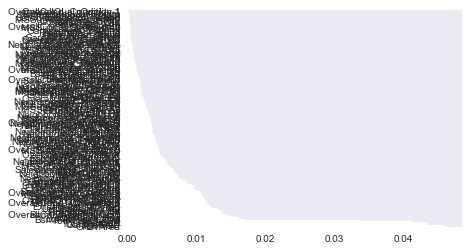

In [158]:
feat_importances = pd.Series(model.feature_importances_,index=Xi_train.columns)
feat_importances.nlargest(180).plot(kind='barh')
plt.show()

In [159]:
best_feat = feat_importances.nlargest(180).index.tolist()

In [160]:
# train and test set with selected features
Xf_train = Xi_train[best_feat]
Xf_test = Xi_test[best_feat]

### 3.Grid Search and Model

In [161]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_absolute_error

In [162]:
# Split the dataset further, we'll have Train,Validation and Test Datasets
X_train,X_valid,Y_train,Y_valid = train_test_split(Xf_train,yi,test_size=0.3,random_state=42)

In [163]:
# Tuning the Random Forest Regressor

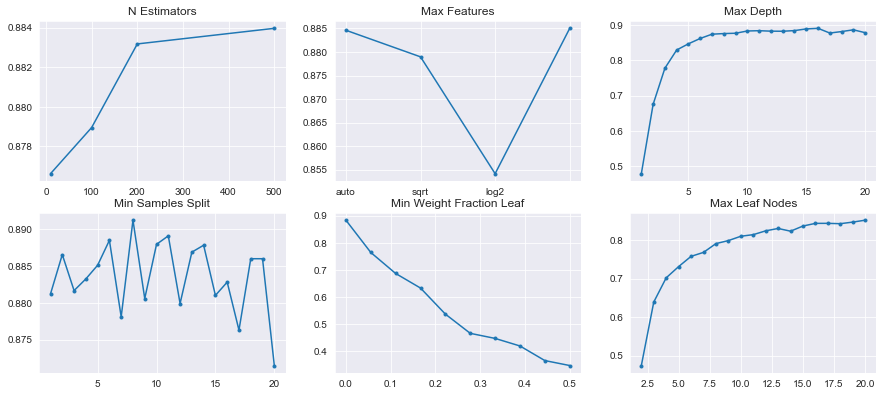

In [164]:
plt.figure(figsize=(15,10))

# Estimators
plt.subplot(3,3,1)
estimator_param = [10,100,200,500]
scores = []
for feature in estimator_param:
    modelx = RandomForestRegressor(n_estimators=feature)
    modelx.fit(X_train,Y_train)
    scores.append(modelx.score(X_valid,Y_valid))
plt.plot(estimator_param,scores, '.-')
plt.axis('tight')
plt.title('N Estimators')
plt.grid();

#Max Features
plt.subplot(3,3,2)
feature_param = ['auto','sqrt','log2',None]
scores=[]
for feature in feature_param:
    modelx = RandomForestRegressor(max_features=feature)
    modelx.fit(X_train,Y_train)
    scores.append(modelx.score(X_valid,Y_valid))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Max Features')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Depth
plt.subplot(3,3,3)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    modelx = RandomForestRegressor(max_depth=feature)
    modelx.fit(X_train,Y_train)
    scores.append(modelx.score(X_valid,Y_valid))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Depth')
plt.grid();

#Min Samples Split
plt.subplot(3,3,4)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    model = RandomForestRegressor(min_samples_split =feature)
    modelx.fit(X_train,Y_train)
    scores.append(modelx.score(X_valid,Y_valid))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Samples Split')
plt.grid();

#Min Weight Fraction Leaf
plt.subplot(3,3,5)
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    modelx = RandomForestRegressor(min_weight_fraction_leaf =feature)
    modelx.fit(X_train,Y_train)
    scores.append(modelx.score(X_valid,Y_valid))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Weight Fraction Leaf')
plt.grid();

#Max Leaf Nodes
plt.subplot(3,3,6)
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    modelx = RandomForestRegressor(max_leaf_nodes=feature)
    modelx.fit(X_train,Y_train)
    scores.append(modelx.score(X_valid,Y_valid))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Leaf Nodes')
plt.grid();

In [165]:
# Applying tuned Random Forest classifier

In [166]:
model = RandomForestRegressor(n_estimators = 200,
                                max_features = 'auto',
                                max_depth = 10,                                
                                min_samples_split = 10,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 20)

model.fit(X_train,Y_train)
y_pred = model.predict(X_valid)

mean_absolute_error(y_pred,Y_valid)

21424.25296032179

In [167]:
# Using XgBoost 

In [168]:
from xgboost import XGBRegressor

In [169]:
modelx =  XGBRegressor(n_estimators=1000, learning_rate=0.05)
modelx.fit(X_train,Y_train)
y_predx = modelx.predict(X_valid)
mean_absolute_error(y_predx,Y_valid)

[14:42:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


16685.43758918379

In [170]:
# Final Prediction and Submission => using XGBoost

In [171]:
Y_pred = modelx.predict(Xf_test)

# push to submission file
submission = pd.DataFrame({
        'Id': Xf_test.index,
        'SalePrice': Y_pred
    })
submission.to_csv('housing_pred2.csv', index=False)